## Background

To use sktime library with the content of the book "Forecasting: Principles and Practice" by Rob J Hyndman and George Athanasopoulos.

This chapter mainly covers the basic knowledges of time series analysis.

In [1]:
import os
import warnings

import datetime
import time
import pandas as pd
import numpy as np

from scipy import stats

from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore",category=mpl.MatplotlibDeprecationWarning)
sns.set_style('darkgrid')

# 1. Benchmarks

In [2]:
data = pd.read_csv("./data/ausbeer.csv")

data['index'] = data['index'].apply(lambda x: x.replace(' ', '-'))
qs = data['index'].tolist()

data['date'] = pd.PeriodIndex(qs, freq='Q').to_timestamp()
data['year'] = pd.DatetimeIndex(data['date']).year
data['quarter'] = data['index'].apply(lambda x: x.split('-')[1])

data.set_index('index', inplace=True)
data.index = pd.PeriodIndex(data.index, freq='Q')

In [3]:
data.head()

,value,date,year,quarter
index,,,,
1956Q1,284,1956-01-01,1956,Q1
1956Q2,213,1956-04-01,1956,Q2
1956Q3,227,1956-07-01,1956,Q3
1956Q4,308,1956-10-01,1956,Q4
1957Q1,262,1957-01-01,1957,Q1


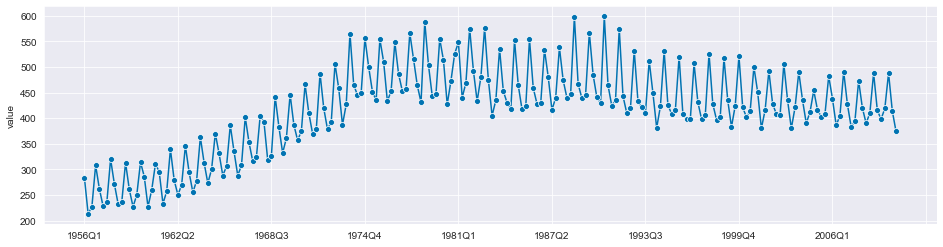

In [4]:
plot_series(data['value'])

plt.show()

## Average

In [5]:
# step 1: specifying forecasting horizon
fh = np.arange(1, 37)
# step 2: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="mean", window_length=100)
# step 3: fitting the forecaster
forecaster.fit(y=data['value'])
# step 4: querying predictions
y_pred = forecaster.predict(fh)

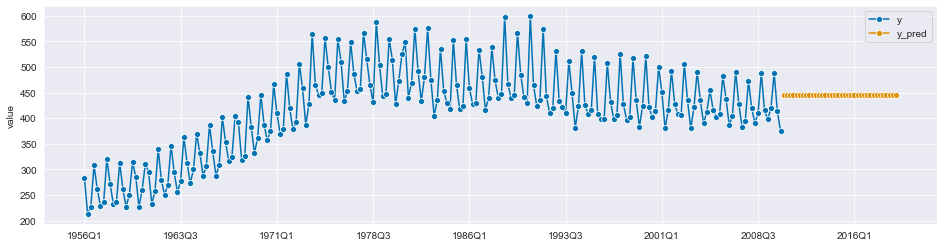

In [6]:
# plotting predictions and past data
plot_series(data['value'], y_pred, labels=["y", "y_pred"])

plt.show()

## Naive method

In [7]:
# step 1: specifying forecasting horizon
fh = np.arange(1, 37)
# step 2: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last")
# step 3: fitting the forecaster
forecaster.fit(y=data['value'])
# step 4: querying predictions
y_pred = forecaster.predict(fh)

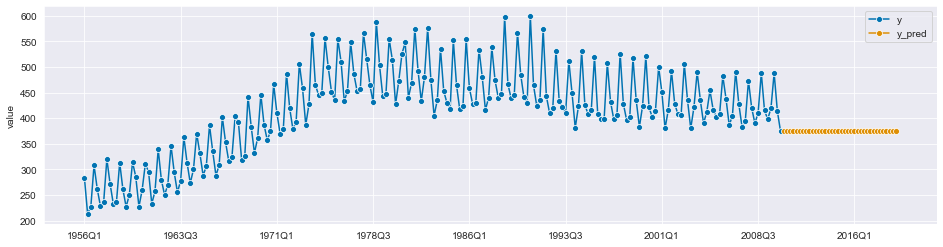

In [8]:
# plotting predictions and past data
plot_series(data['value'], y_pred, labels=["y", "y_pred"])

plt.show()

## Seasonal naive method

In [9]:
# step 1: specifying forecasting horizon
fh = np.arange(1, 37)
# step 2: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=4)
# step 3: fitting the forecaster
forecaster.fit(y=data['value'])
# step 4: querying predictions
y_pred = forecaster.predict(fh)

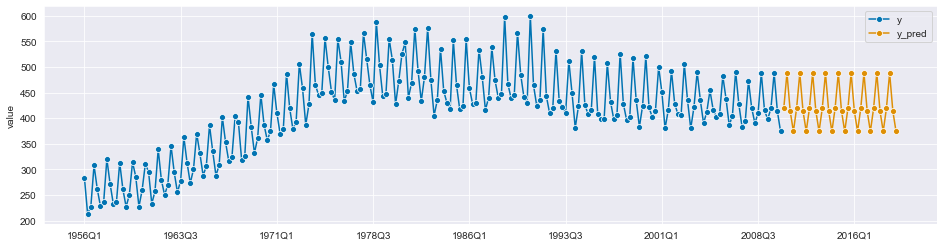

In [10]:
# plotting predictions and past data
plot_series(data['value'], y_pred, labels=["y", "y_pred"])

plt.show()

## Drift

- This is equivalent to drawing a line between the first and last observations, and extrapolating it into the future.

In [11]:
# step 1: specifying forecasting horizon
fh = np.arange(1, 37)
# step 2: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="drift")
# step 3: fitting the forecaster
forecaster.fit(y=data['value'])
# step 4: querying predictions
y_pred = forecaster.predict(fh)

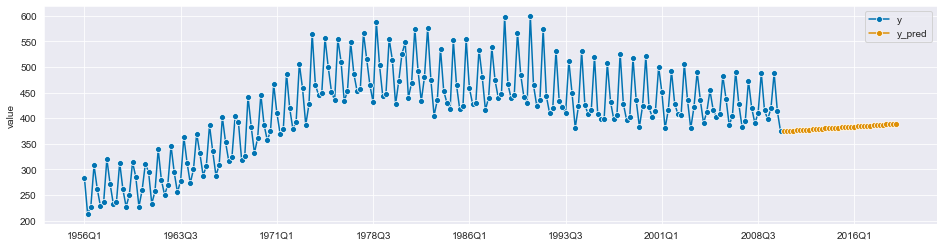

In [12]:
# plotting predictions and past data
plot_series(data['value'], y_pred, labels=["y", "y_pred"])

plt.show()

# 2. Adjustments

## Calendar adjustment

Page 62

For example, there will be variation between the months simply because of the different numbers of days in each month.

In [13]:
data = pd.read_csv("./data/milk.csv")
data['date'] = pd.to_datetime(data['index'])
data['year'] = pd.DatetimeIndex(data['date']).year
data['month_int'] = pd.DatetimeIndex(data['date']).month

data['monthday'] = data['date'].apply(lambda x: x.days_in_month)
data['daily_avg'] = data['value']/data['monthday']

data.set_index('date', inplace=True)

data.head()

,index,value,year,month_int,monthday,daily_avg
date,,,,,,
1962-01-01,Jan 1962,589,1962,1,31,19.000000
1962-02-01,Feb 1962,561,1962,2,28,20.035714
1962-03-01,Mar 1962,640,1962,3,31,20.645161
1962-04-01,Apr 1962,656,1962,4,30,21.866667
1962-05-01,May 1962,727,1962,5,31,23.451613


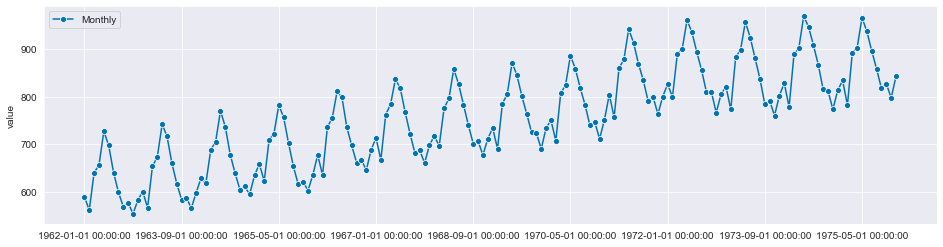

In [14]:
plot_series(data['value'], labels=['Monthly'])

plt.show()

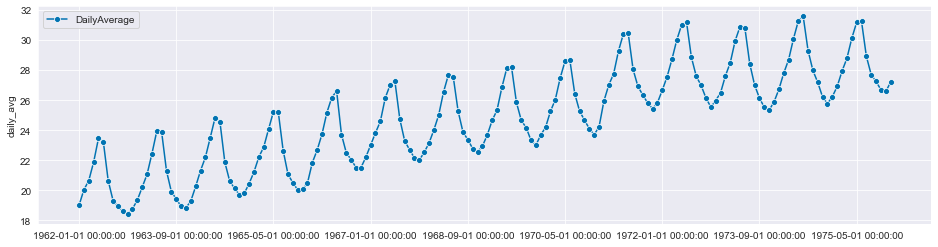

In [15]:
plot_series(data['daily_avg'], labels=['DailyAverage'])

plt.show()

## Mathematical transformations

Page 66

Example: Box-Cox transformations

In [16]:
data = pd.read_csv("./data/elec.csv")

data['date'] = pd.to_datetime(data['index'])
data.set_index('date', inplace=True)

data['box-cox-value'], lambda_value = stats.boxcox(data['value'])

print(lambda_value)

data.head()

0.3896252316581785


,index,value,box-cox-value
date,,,
1956-01-01,Jan 1956,1254,38.788412
1956-02-01,Feb 1956,1290,39.246993
1956-03-01,Mar 1956,1379,40.348161
1956-04-01,Apr 1956,1346,39.945069
1956-05-01,May 1956,1535,42.178084


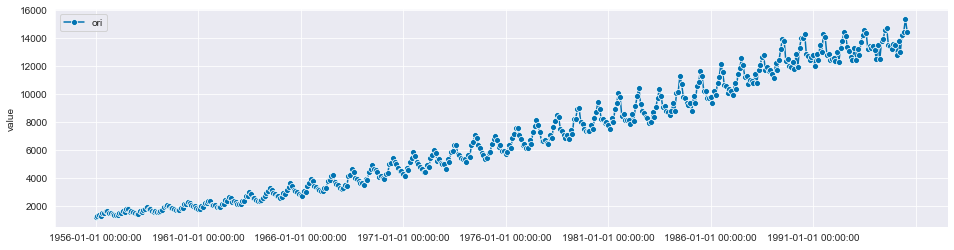

In [17]:
plot_series(data['value'], labels=['ori'])

plt.show()

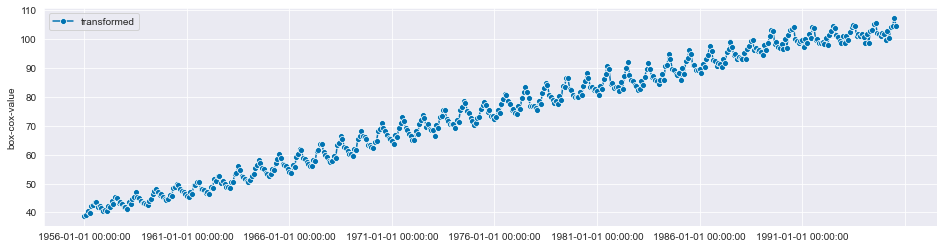

In [18]:
plot_series(data['box-cox-value'], labels=['transformed'])

plt.show()

## Residuals

Page 71

- It is calculated on the training set.

In [19]:
data = pd.read_csv("./data/goog200.csv")

In [20]:
data['pred'] = data['value'].shift(periods=1)

data = data.iloc[1: , :]

data['residuals'] = data['value']-data['pred']

In [21]:
data.head()

,index,value,pred,residuals
1,2,392.512085,392.830017,-0.317932
2,3,397.305908,392.512085,4.793823
3,4,398.011322,397.305908,0.705414
4,5,400.490204,398.011322,2.478882
5,6,408.095734,400.490204,7.605530


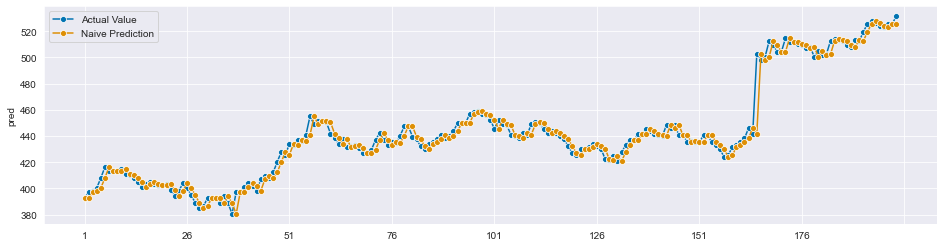

In [22]:
plot_series(data['value'], data['pred'], labels=['Actual Value', 'Naive Prediction'])

plt.show()

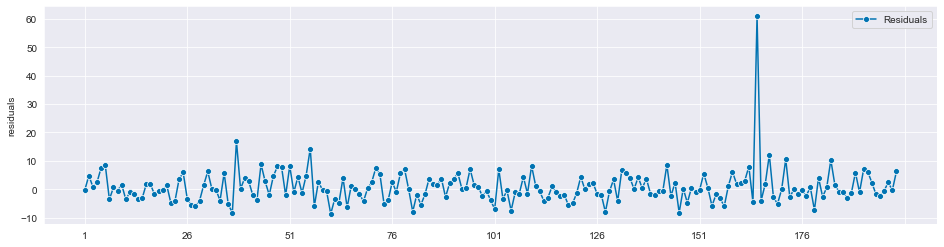

In [23]:
plot_series(data['residuals'], labels=['Residuals'])

plt.show()

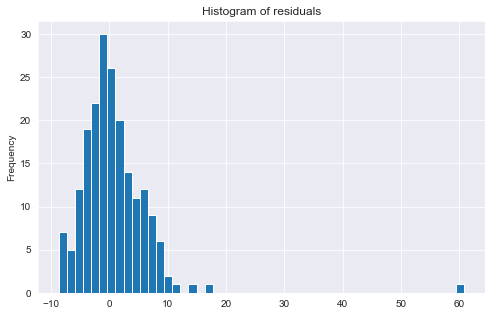

In [24]:
plt.figure(figsize=(8,5))

data['residuals'].plot.hist(bins=50)

plt.title('Histogram of residuals')

plt.show()

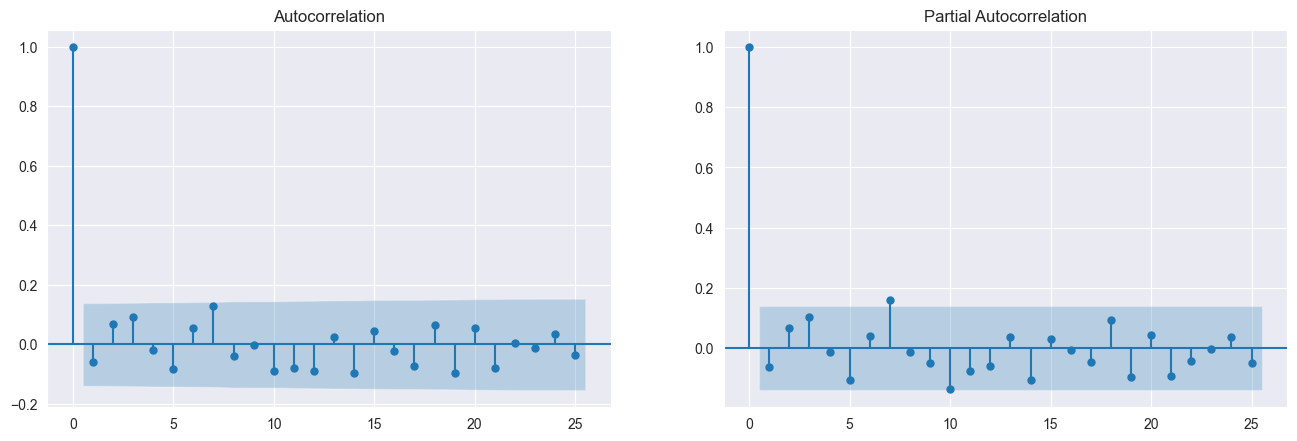

In [25]:
# Draw Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5), dpi= 100)
plot_acf(data['residuals'].tolist(), lags=25, ax=axes[0])
plot_pacf(data['residuals'].tolist(), lags=25, ax=axes[1])

plt.show()

In [28]:
print('mean: ', data['residuals'].mean())
print('standard deviation: ', data['residuals'].std())

mean:  0.6967248944723615
standard deviation:  6.18448666847128


**Observations**

- **Time plot of residuals**: The variation of the residuals stays much the same, apart from the outlier. Therefore, variance can be treated as constant.
- **Histogram:** The mean of the residuals is close to zero. But, it is not normally distributed even when we ignore the outlier.
- **Autocorrelation:** There is no significant correlation in the residuals series.

Remember that prediction intervals are made under assumption of normal distribution. Hence, the prediction intervals might be inaccurate if the data is not normally distributed.

## Box-Pierce test and Ljung-Box test

In [29]:
import statsmodels.api as sm

df_test = sm.stats.acorr_ljungbox(data['residuals'].tolist(), lags=10, boxpierce=True, return_df=True)

df_test

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.736646,0.390737,0.725651,0.394296
2,1.697581,0.427932,1.667463,0.434425
3,3.474228,0.324120,3.399915,0.333977
4,3.541294,0.471627,3.464979,0.483223
5,4.986369,0.417546,4.859728,0.433238
6,5.651156,0.463379,5.498056,0.481692
7,9.046375,0.249344,8.741250,0.271771
8,9.362087,0.312677,9.041255,0.338828
9,9.363932,0.404381,9.042999,0.433315
10,11.031436,0.355074,10.610950,0.388620


**Observations**

- The p_value for both Box-Pierce and Ljung-Box tests have high p-value. Thus, the result is insignificant.
- So, we can conclude that the residuals are not distinguishable from a white noise series. 

In [30]:
from sktime.forecasting.model_selection import temporal_train_test_split, SlidingWindowSplitter
from sktime.performance_metrics.forecasting import mean_squared_error

In [31]:
data = pd.read_csv("./data/goog200.csv")

data.head()

,index,value
0,1,392.830017
1,2,392.512085
2,3,397.305908
3,4,398.011322
4,5,400.490204


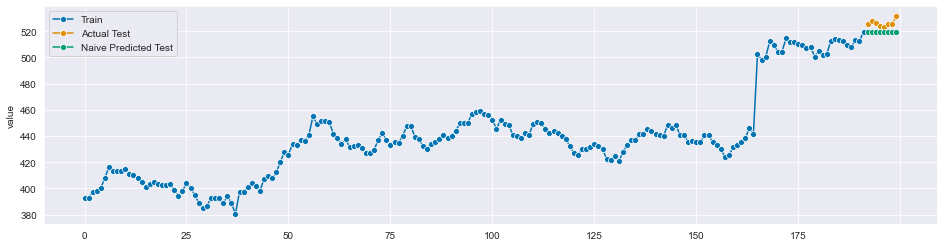

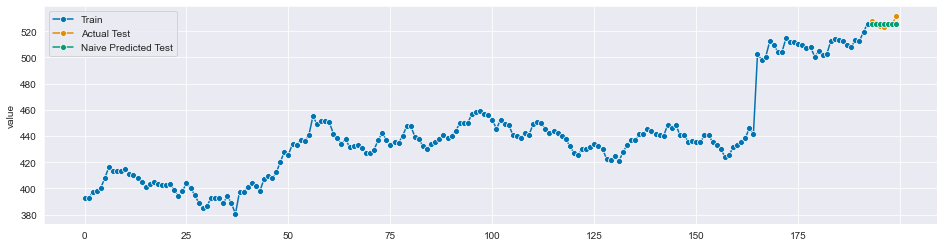

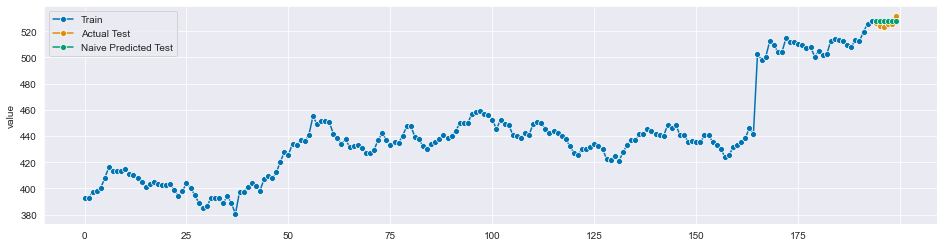

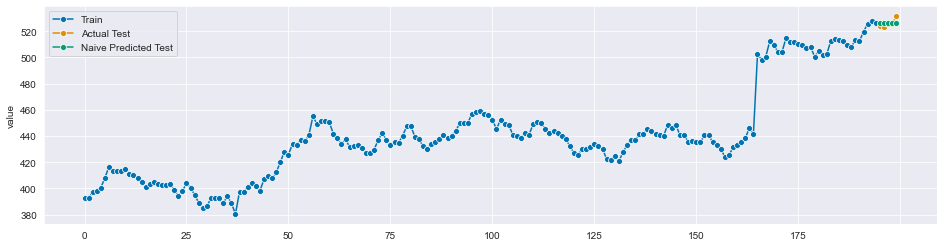

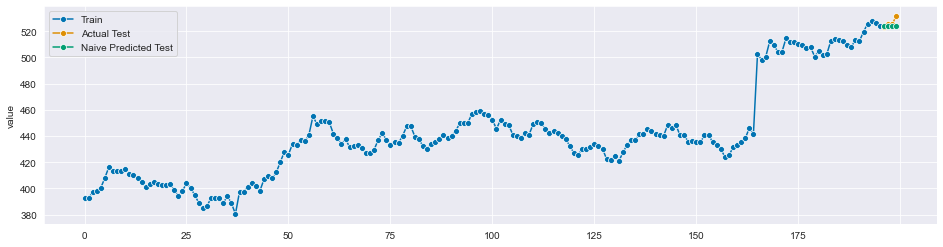

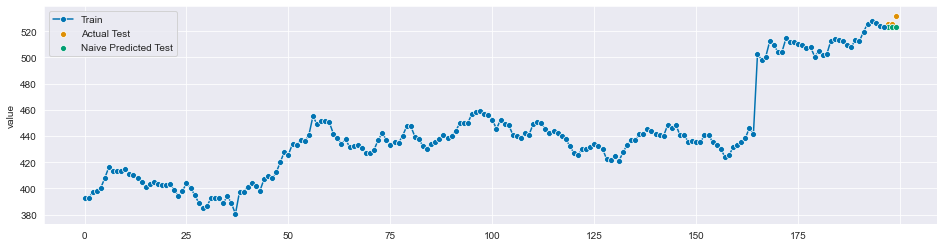

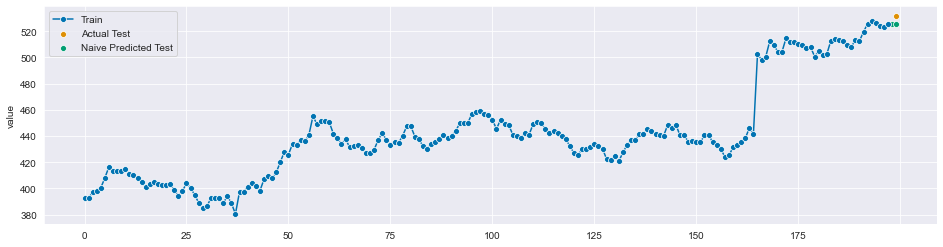

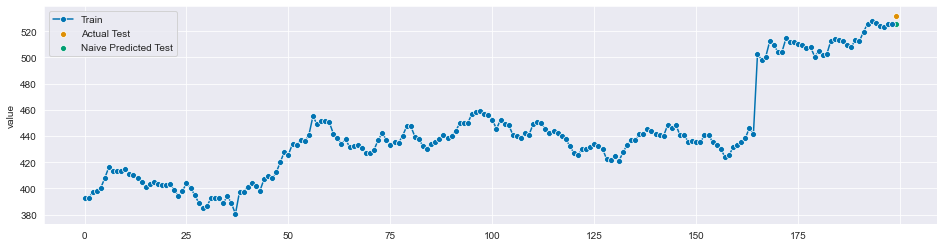

In [32]:
mse_list = list()

for i in range(8, 0, -1):
    
    y_train, y_test = temporal_train_test_split(data['value'], test_size=i)

    # step 1: specifying forecasting horizon
    fh = np.arange(1, i+1)
    # step 2: specifying the forecasting algorithm
    forecaster = NaiveForecaster(strategy="last")
    # step 3: fitting the forecaster
    forecaster.fit(y=y_train)
    # step 4: querying predictions
    y_pred = forecaster.predict(fh)
    
    plot_series(y_train, y_test, y_pred, labels=['Train', 'Actual Test', 'Naive Predicted Test'])
    plt.show()
    
    mse_list.append(mean_squared_error(y_test, y_pred))

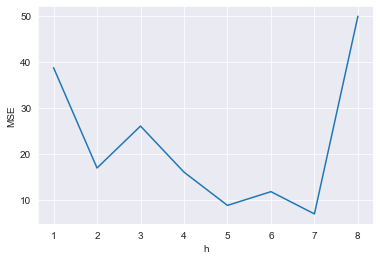

In [33]:
plt.plot(list(range(8, 0, -1)), mse_list)

plt.xlabel('h')
plt.ylabel('MSE')

plt.show()

## Prediction Intervals

Page 91

- The method below is only suitable for the forecast errors that have normal distribution.
- When a normal distribution for the forecast errors is an unreasonable assumption, one alternative is to use bootstrapping. 

In [37]:
from sktime.forecasting.theta import ThetaForecaster

y_train, y_test = temporal_train_test_split(data['value'], test_size=8)
alpha = 0.05

# step 1: specifying forecasting horizon
fh = np.arange(1, 9)
# step 2: specifying the forecasting algorithm
forecaster = ThetaForecaster(sp=1)
# step 3: fitting the forecaster
forecaster.fit(y=y_train)
# step 4: querying predictions
y_pred, y_pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)

In [38]:
y_pred_ints

,lower,upper
192,502.729309,536.769172
193,499.313815,540.665290
194,496.453948,544.005781
195,493.954101,546.986252
196,491.712035,549.708943
197,489.666326,552.235276
198,487.776649,554.605578
199,486.014840,556.848010


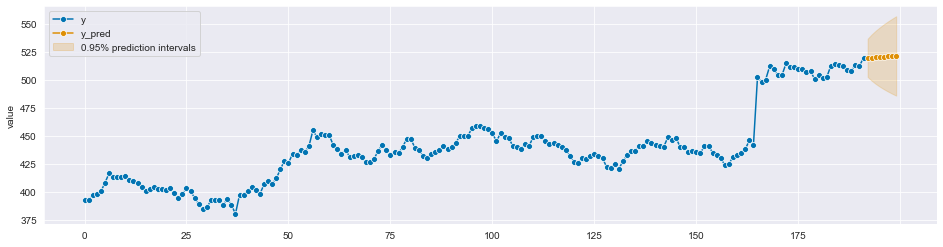

In [40]:
fig, ax = plot_series(y_train, y_pred, labels=['y', 'y_pred'])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints['lower'],
    y_pred_ints['upper'],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f'{1 - alpha}% prediction intervals',
)
ax.legend()

---

## Reference

1. "Forecasting: Principles and Practice" by Rob J Hyndman and George Athanasopoulos